In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Activation
from keras.optimizers import Adam
from keras.callbacks import TensorBoard
from matplotlib import pyplot as plt
from keras.utils.np_utils import to_categorical 
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import BatchNormalization
import time
from sklearn.metrics import classification_report

In [ ]:
# In this section, we chose to train the best models and retrieve a classification report for each model.
# We chose to keep 1 model per CNN type, 1 for a 1-Layer CNN, 1 for a 2-Layer CNN, 1 for a 3-Layer CNN, 1 for a 4-Layer CNN

# Define the 1st Convolutional Neural Network, the best of our 1-Layer CNN tested so far.
name1 = '1_NN_256'
cnn_model_1 = Sequential([], name = name1)
# 1st Convolutional Layer
cnn_model_1.add(Conv2D(256, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
cnn_model_1.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model_1.add(BatchNormalization())
cnn_model_1.add(Flatten())
cnn_model_1.add(Dense(128, activation='relu'))
cnn_model_1.add(Dense(10, activation='softmax'))

# Define the 2nd Convolutional Neural Network, the best of our 2-Layer CNN tested so far.
name2 = '2_NN_128_128'
cnn_model_2 = Sequential([], name = name2)
# 1st Convolutional Layer
cnn_model_2.add(Conv2D(128, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
cnn_model_2.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model_2.add(BatchNormalization())
# 2nd Convolutional Layer
cnn_model_2.add(Conv2D(128, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
cnn_model_2.add(BatchNormalization())
cnn_model_2.add(Flatten())
cnn_model_2.add(Dense(128, activation='relu'))
cnn_model_2.add(Dense(10, activation='softmax'))

# Define the 3rd Convolutional Neural Network, the best of our 3-Layer CNN tested so far.
name3 = '3_NN_128_256_256'
cnn_model_3 = Sequential([], name = name3)
# 1st Convolutional Layer
cnn_model_3.add(Conv2D(128, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
cnn_model_3.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model_3.add(BatchNormalization())
# 2nd Convolutional Layer
cnn_model_3.add(Conv2D(256, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
cnn_model_3.add(BatchNormalization())
# 3rd Convolutional Layer
cnn_model_3.add(Conv2D(256, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
cnn_model_3.add(Dense(256, activation='relu'))
cnn_model_3.add(Flatten())
cnn_model_3.add(Dense(128, activation='relu'))
cnn_model_3.add(Dense(10, activation='softmax'))

# Define the 4th Convolutional Neural Network, the best of our 4-Layer CNN tested so far.
name4 = '4_NN_128_128_128_128'
cnn_model_4 = Sequential([],name = name4)
# 1st Convolutional Layer
cnn_model_4.add(Conv2D(128, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
cnn_model_4.add(BatchNormalization())
# 2nd Convolutional Layer
cnn_model_4.add(Conv2D(128, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
cnn_model_4.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model_4.add(BatchNormalization())
# 3rd Convolutional Layer
cnn_model_4.add(Conv2D(128, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
cnn_model_4.add(Dense(128, activation='relu'))
# 4th Convolutional Layer
cnn_model_4.add(Conv2D(128, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
cnn_model_4.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model_4.add(BatchNormalization())
cnn_model_4.add(Flatten())
cnn_model_4.add(Dense(128, activation='relu'))
cnn_model_4.add(Dense(10, activation='softmax'))

# Edit the following 2 lines if you want to get the classification report for every model.
# cnn_models = [cnn_model_1,cnn_model_2,cnn_model_3,cnn_model_4]
cnn_models=[cnn_model_4]
names=[name1, name2, name3, name4]

In [ ]:
# ~ Data preprocessing section ~
# Save the training data from fashion-mnist_test.csv to the "train" DataFrame
train = pd.read_csv("drive/MyDrive/Colab Notebooks/fashion-mnist_train.csv")
# Save the testing data from fashion-mnist_test.csv to the "test" DataFrame
test = pd.read_csv("drive/MyDrive/Colab Notebooks/fashion-mnist_test.csv")

In [ ]:
# With the following function, we get the number of correct/incorrect predictions
def get_statistics(n,y_true,predicted_classes,correct,incorrect):
    for i in range(0,1000):
        if y_true[i] == n and predicted_classes[i] == n :
            correct['Class'+str(n)] +=1 
        elif y_true[i] == n and predicted_classes[i] != n :
            incorrect['Class'+str(n)] +=1
    return(correct, incorrect)


In [ ]:
def bullet_1(model,fig_num,):
    # Data preprocessing ~ same as before
    Y_train = train['label'].values
    X_train = train.drop(labels = ['label'], axis = 1)
    X_train = X_train / 255.0
    X_train = X_train.values.reshape(-1,28,28,1)
    Y_train = to_categorical(Y_train, num_classes = 10)
    test0=test.sample(n=1000)
    X_test = test0.drop(labels = ['label'], axis = 1)
    X_test = X_test / 255.0
    X_test = X_test.values.reshape(-1,28,28,1)
    # Define our optimizer
    optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
    # Define our datagenerator object
    datagen = ImageDataGenerator(
            featurewise_center=False,  # set input mean to 0 over the dataset
            samplewise_center=False,  # set each sample mean to 0
            featurewise_std_normalization=False,  # divide inputs by std of the dataset
            samplewise_std_normalization=False,  # divide each input by its std
            zca_whitening=False,  # dimesion reduction
            rotation_range=0.1,  # randomly rotate images in the range
            zoom_range = 0.1, # Randomly zoom image
            width_shift_range=0.1,  # randomly shift images horizontally
            height_shift_range=0.1,  # randomly shift images vertically
            horizontal_flip=False,  # randomly flip images
            vertical_flip=False)  # randomly flip images
    # Compile each model
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    # Generate data with the parameters given above, of our training DataFrame
    datagen.fit(X_train)
    # Initialize split method
    X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state = 2)

    start=time.time()
    history = model.fit_generator(datagen.flow(X_train, Y_train, batch_size=128),
                                  shuffle=True, epochs=15, 
                                  validation_data = (X_val, Y_val),verbose = 1, 
                                  steps_per_epoch=X_train.shape[0] // 128)
    end=time.time()
   
    # Get true labels of test data 
    y_true = test0.iloc[:, 0]
    # Convert to np array
    y_true=np.array(y_true)
    # Make predictions of classes
    start1=time.time()
    predicted_classes = model.predict_classes(X_test)
    end1=time.time()
    # Set name of classes 
    target_names = ["Class{}".format(i) for i in range(10)]
    # Classification report to get precision recall f1 score support
    print(classification_report(y_true, predicted_classes, target_names=target_names))
    print("Training time : " + str(end-start))
    print("Prediction of 1000 images time:",end1-start1)
    """
    Precision= Accuacy of positive predictions - What percent of your predictions were correct?
    Recall = Fraction of positives that were correctly indetified -What percent of the positive cases did you catch?
    F1 Score -What percent of positive predictions were correct?
    Support = the number of actual occurrences of the class in the specified dataset.
    """
    labels=target_names
    # Dictionaries with keys the classes 
    correct={} 
    incorrect={}
    
    for name in target_names:
            correct[name] = 0
            incorrect[name] = 0
    
    for c in range(0,10):
        get_statistics(c,y_true,predicted_classes,correct,incorrect)
    corrects=[] #list of correct predictions per classes
    for v in correct.values():
        corrects.append(v)
    incorrects=[] #list of incorrect predictions per classes
    for v in incorrect.values():
        incorrects.append(v)
        
    # ~ Plotting section
    x = np.arange(len(labels))  # the label locations
    width = 0.4  # the width of the bars
    #fig, ax = plt.subplots()
    fig, ax = plt.subplots(figsize=(15,15))
    # Define 2 bars inside the plot
    rects1 = ax.bar(x - width/2, corrects, width, align="edge", label='Correct Classified')
    rects2 = ax.bar(x + width/2, incorrects, width, align="edge", label='Incorrect Classified')


    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Scores')
    ax.set_title('Classification results')
    ax.set_xticks(x+0.2)
    ax.set_xticklabels(labels)
    ax.legend()
    # The following function labels above each "reacts" bar, displaying its height
    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')
    autolabel(rects1)
    autolabel(rects2)
    plt.show()
    # Save the figures
    s='im'+str(fig_num)+'.png'
    plt.savefig(s)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
421/421 [==============================] - 16s 37ms/step - loss: 0.1863 - accuracy: 0.9300 - val_loss: 0.2134 - val_accuracy: 0.9223
Epoch 2/15
421/421 [==============================] - 16s 37ms/step - loss: 0.1819 - accuracy: 0.9311 - val_loss: 0.2228 - val_accuracy: 0.9228
Epoch 3/15
421/421 [==============================] - 15s 37ms/step - loss: 0.1697 - accuracy: 0.9378 - val_loss: 0.1892 - val_accuracy: 0.9332
Epoch 4/15
421/421 [==============================] - 15s 37ms/step - loss: 0.1721 - accuracy: 0.9362 - val_loss: 0.2246 - val_accuracy: 0.9250
Epoch 5/15
421/421 [==============================] - 15s 37ms/step - loss: 0.1604 - accuracy: 0.9397 - val_loss: 0.2074 - val_accuracy: 0.9310
Epoch 6/15
421/421 [==============================] - 16s 37ms/step - loss: 0.1657 - accuracy: 0.9372 - val_loss: 0.2254 - val_accuracy: 0.9182
Epoch 7/15
421/421 [==============================] - 15s 37ms/step - loss: 0.1561 - accuracy: 0.9425 - val_loss: 0.2066 - val_accuracy:

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


              precision    recall  f1-score   support

      Class0       0.90      0.90      0.90        94
      Class1       1.00      0.99      0.99       100
      Class2       0.93      0.91      0.92       107
      Class3       0.94      0.95      0.94        93
      Class4       0.89      0.95      0.92       105
      Class5       0.98      0.98      0.98       100
      Class6       0.84      0.81      0.82       104
      Class7       0.96      0.94      0.95        98
      Class8       1.00      0.99      0.99        96
      Class9       0.95      0.98      0.97       103

    accuracy                           0.94      1000
   macro avg       0.94      0.94      0.94      1000
weighted avg       0.94      0.94      0.94      1000

Training time : 234.03286981582642
Prediction of 1000 images time: 0.1162424087524414


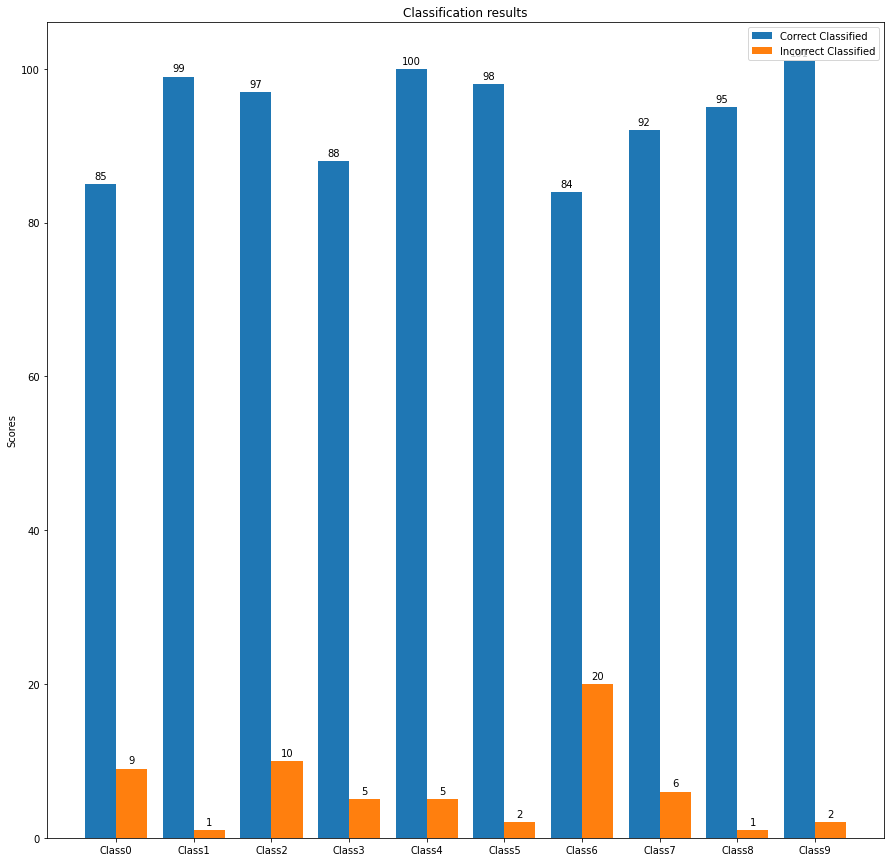

<Figure size 432x288 with 0 Axes>

In [ ]:
fig_num=0
# By calling the function, the training begins for every model 
for model in cnn_models:
    bullet_1(model,fig_num)
    fig_num+=1